In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
from PIL import Image
import urllib.request
from io import BytesIO

# Specify the URL of the image
image_url = 'https://github.com/caiofalcheti/PDI-UFABC-1Q2026/blob/main/images/edson.jpg?raw=true'

try:
    # Open the URL and read the image data into a BytesIO object
    with urllib.request.urlopen(image_url) as url:
        f = BytesIO(url.read())

    # Open the image from the byte stream using PIL
    src = Image.open(f)

    # Display or process the image
    img.show() # Note: img.show() might open an external viewer depending on your environment. In Colab, it often doesn't show visually without specific display methods.
    print(f"Image from {image_url} loaded successfully!")

    # If you want to convert to OpenCV format for further processing, you can do:
    # import numpy as np
    # cv_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

except Exception as e:
    print(f"Error loading image from URL: {e}")
    print("Please ensure the URL is a raw image URL (ends with ?raw=true or is from raw.githubusercontent.com) and is accessible.")

Image from https://github.com/caiofalcheti/PDI-UFABC-1Q2026/blob/main/images/edson.jpg?raw=true loaded successfully!


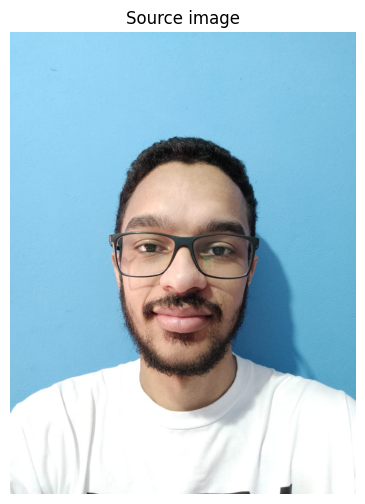

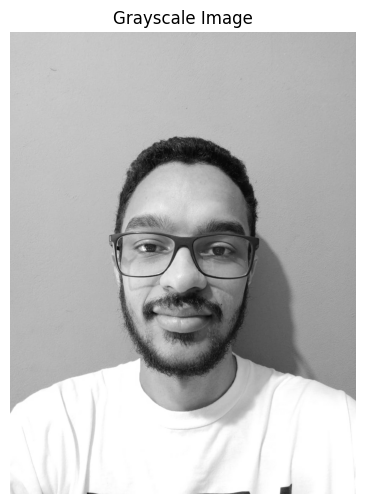

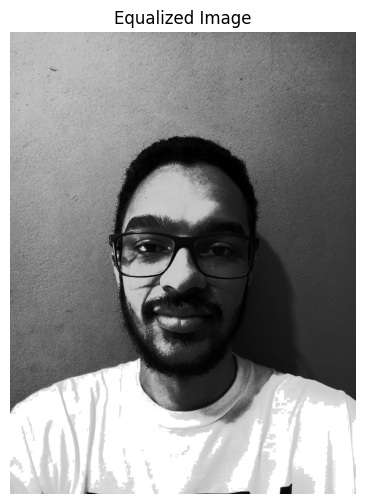

In [9]:
import matplotlib.pyplot as plt
from __future__ import print_function
import cv2 as cv
import numpy as np # Import numpy

# Convert PIL Image 'img' to numpy array for OpenCV
# PIL images are typically RGB. OpenCV functions often expect BGR or a specific color conversion code.
img_np = np.array(img)

# Convert original image to grayscale for histogram equalization
# Assuming 'img_np' is RGB from PIL, convert directly to grayscale using COLOR_RGB2GRAY
src_gray = cv.cvtColor(img_np, cv.COLOR_RGB2GRAY)

# Apply histogram equalization to the grayscale image
dst = cv.equalizeHist(src_gray)


plt.figure(figsize=(12, 6)) # Adjust figure size for better display

plt.subplot(1, 2, 1)
# Display original image. img_np is already RGB, so no BGR2RGB conversion is needed for matplotlib
plt.imshow(img_np)
plt.title('Source image')
plt.axis('off') # Hide axes ticks and labels


plt.figure(figsize=(12, 6)) # Adjust figure size for better display
plt.imshow(src_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.figure(figsize=(12, 6)) # Adjust figure size for better display
plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray') # Display grayscale equalized image
plt.title('Equalized Image')
plt.axis('off') # Hide axes ticks and labels

plt.show()

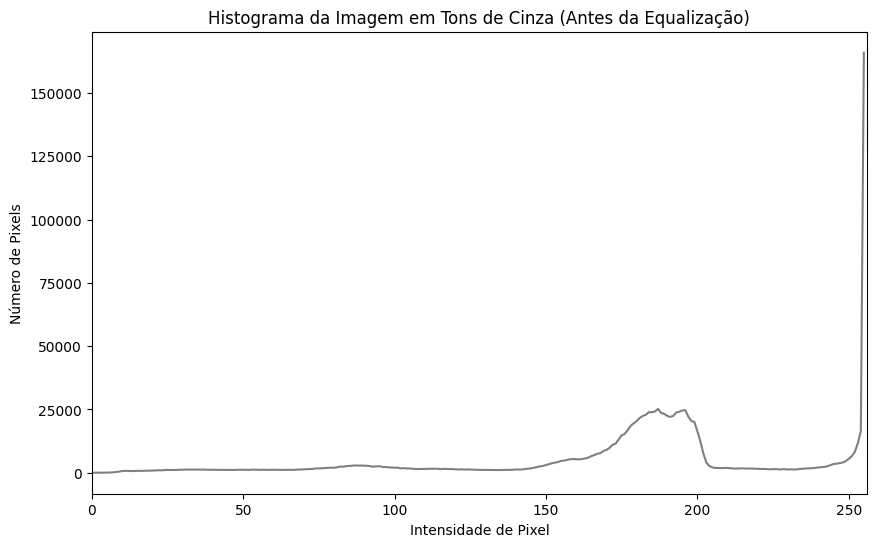

In [10]:
import cv2 as cv
import matplotlib.pyplot as plt

# 1. Calcular o histograma da imagem em tons de cinza
hist = cv.calcHist([src_gray], [0], None, [256], [0, 256])

# 2. Criar uma figura para o plot usando matplotlib.pyplot e definir um tamanho apropriado
plt.figure(figsize=(10, 6))

# 3. Plotar o histograma calculado
plt.plot(hist, color='gray')

# 4. Adicionar um título ao plot
plt.title('Histograma da Imagem em Tons de Cinza (Antes da Equalização)')

# 5. Adicionar rótulos aos eixos x e y
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')

# Definir limites para o eixo x
plt.xlim([0, 256])

# 6. Exibir o plot do histograma
plt.show()

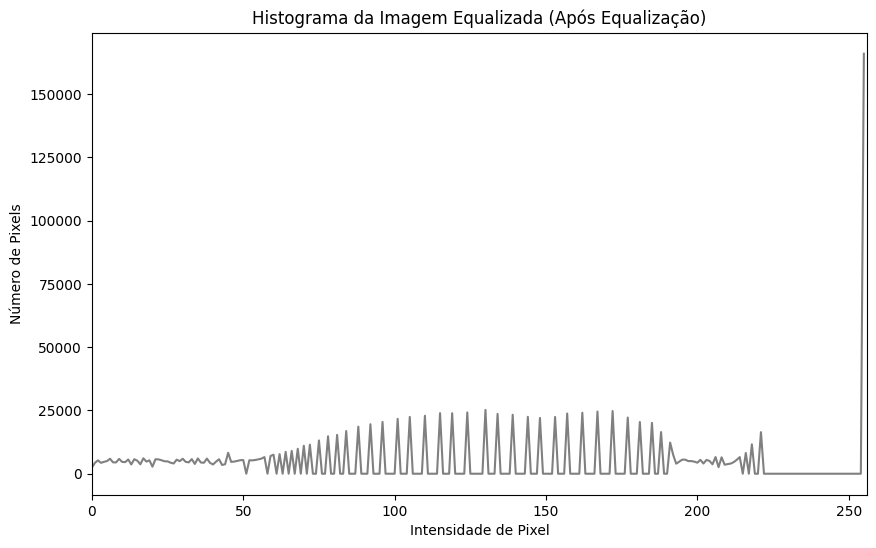

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt

# 1. Calcular o histograma da imagem equalizada
hist_equalized = cv.calcHist([dst], [0], None, [256], [0, 256])

# 2. Criar uma figura para o plot usando matplotlib.pyplot e definir um tamanho apropriado
plt.figure(figsize=(10, 6))

# 3. Plotar o histograma calculado
plt.plot(hist_equalized, color='gray')

# 4. Adicionar um título ao plot
plt.title('Histograma da Imagem Equalizada (Após Equalização)')

# 5. Adicionar rótulos aos eixos x e y
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')

# Definir limites para o eixo x
plt.xlim([0, 256])

# 6. Exibir o plot do histograma
plt.show()

In [22]:
import numpy as np # Ensure numpy is imported

# Convert the PIL image 'src' to a NumPy array
src_np = np.array(src)

# Convert the RGB NumPy array to BGR format for OpenCV, then split channels
src_bgr = cv.cvtColor(src_np, cv.COLOR_RGB2BGR)
b, g, r = cv.split(src_bgr)
print("Image split into B, G, R channels.")

Image split into B, G, R channels.


In [23]:
b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)
print("Each channel equalized independently.")

Each channel equalized independently.


In [24]:
equalized_color_image = cv.merge([b_eq, g_eq, r_eq])
print("Equalized channels merged into a new color image.")

Equalized channels merged into a new color image.


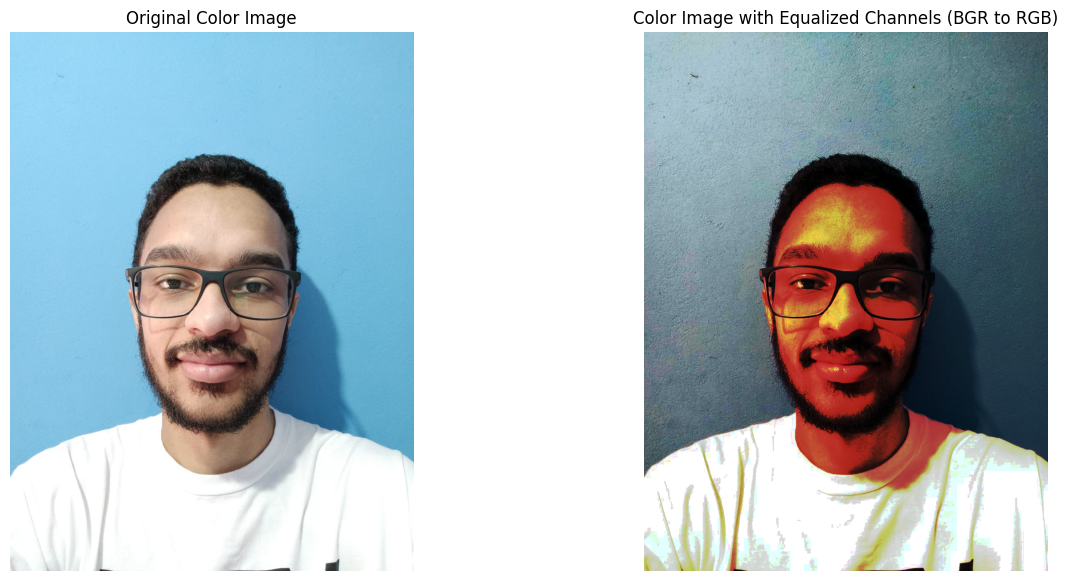

In [25]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
# Use the NumPy array version of the original image (src_np) for display.
# src_np is already in RGB format (from PIL.Image to NumPy), so no BGR2RGB conversion is needed for matplotlib.
plt.imshow(src_np)
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
# equalized_color_image is a NumPy array in BGR format, so convert to RGB for matplotlib.
plt.imshow(cv.cvtColor(equalized_color_image, cv.COLOR_BGR2RGB))
plt.title('Color Image with Equalized Channels (BGR to RGB)')
plt.axis('off')

plt.show()

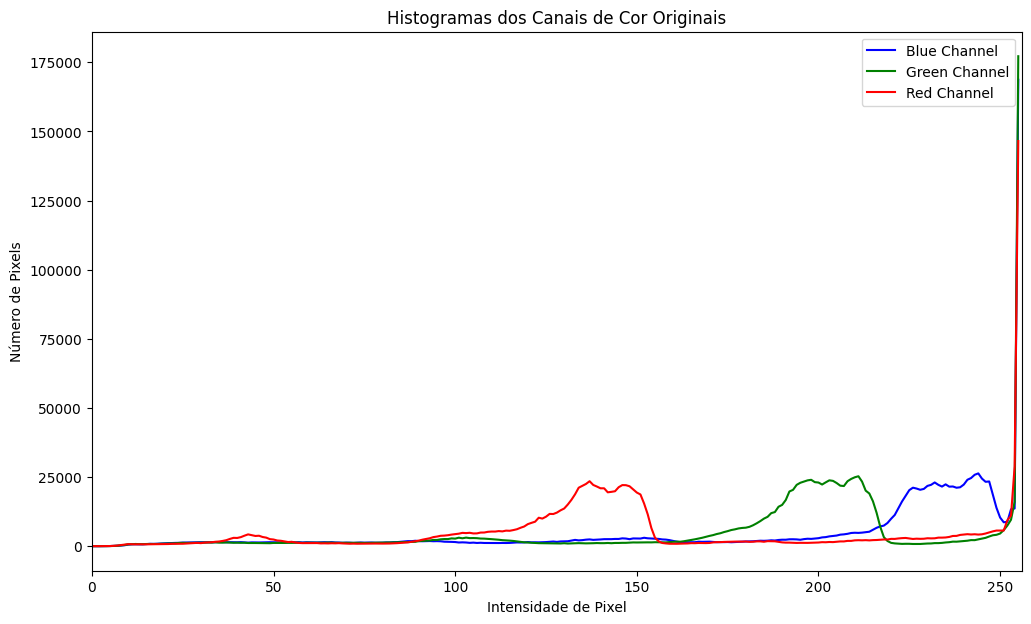

In [20]:
hist_b = cv.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv.calcHist([r], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 7))

plt.plot(hist_b, color='blue', label='Blue Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_r, color='red', label='Red Channel')

plt.title('Histogramas dos Canais de Cor Originais')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')
plt.xlim([0, 256])
plt.legend()
plt.show()


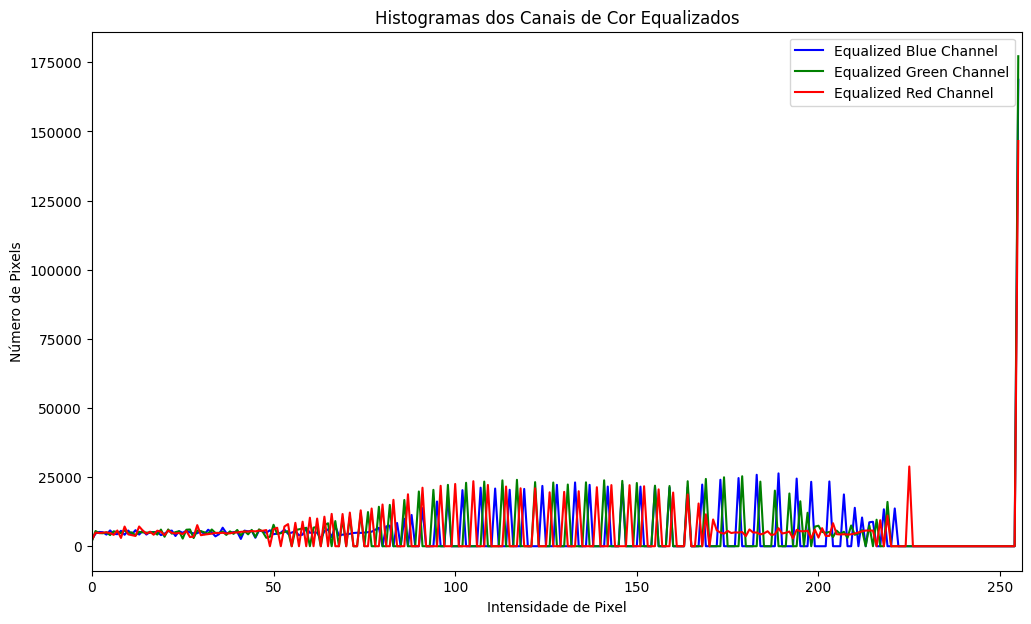

In [21]:
hist_b_eq = cv.calcHist([b_eq], [0], None, [256], [0, 256])
hist_g_eq = cv.calcHist([g_eq], [0], None, [256], [0, 256])
hist_r_eq = cv.calcHist([r_eq], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 7))

plt.plot(hist_b_eq, color='blue', label='Equalized Blue Channel')
plt.plot(hist_g_eq, color='green', label='Equalized Green Channel')
plt.plot(hist_r_eq, color='red', label='Equalized Red Channel')

plt.title('Histogramas dos Canais de Cor Equalizados')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')
plt.xlim([0, 256])
plt.legend()
plt.show()
